In [13]:
import numpy as np
import matplotlib.pyplot as plt
from multiviewica_delay.multiviewica_dilations_shifts._plot_functions import plot_sources_3d

In [7]:
# parameters
task = "visual"
n_subjects = 50
n_components = 5
n_concat = 3

In [8]:
# load results
results_dir = "/storage/store2/work/aheurteb/mvicad/tbme/results/results_camcan/"
W_save_name = f"W_{task}_task_{n_subjects}_{n_components}_{n_concat}.npy"
dilations_save_name = f"dilations_{task}_task_{n_subjects}_{n_components}_{n_concat}.npy"
shifts_save_name = f"shifts_{task}_task_{n_subjects}_{n_components}_{n_concat}.npy"
Y_save_name = f"Y_{task}_task_{n_subjects}_{n_components}_{n_concat}.npy"
W_list = np.load(results_dir + W_save_name)
dilations = np.load(results_dir + dilations_save_name)
shifts = np.load(results_dir + shifts_save_name)
Y_list = np.load(results_dir + Y_save_name)

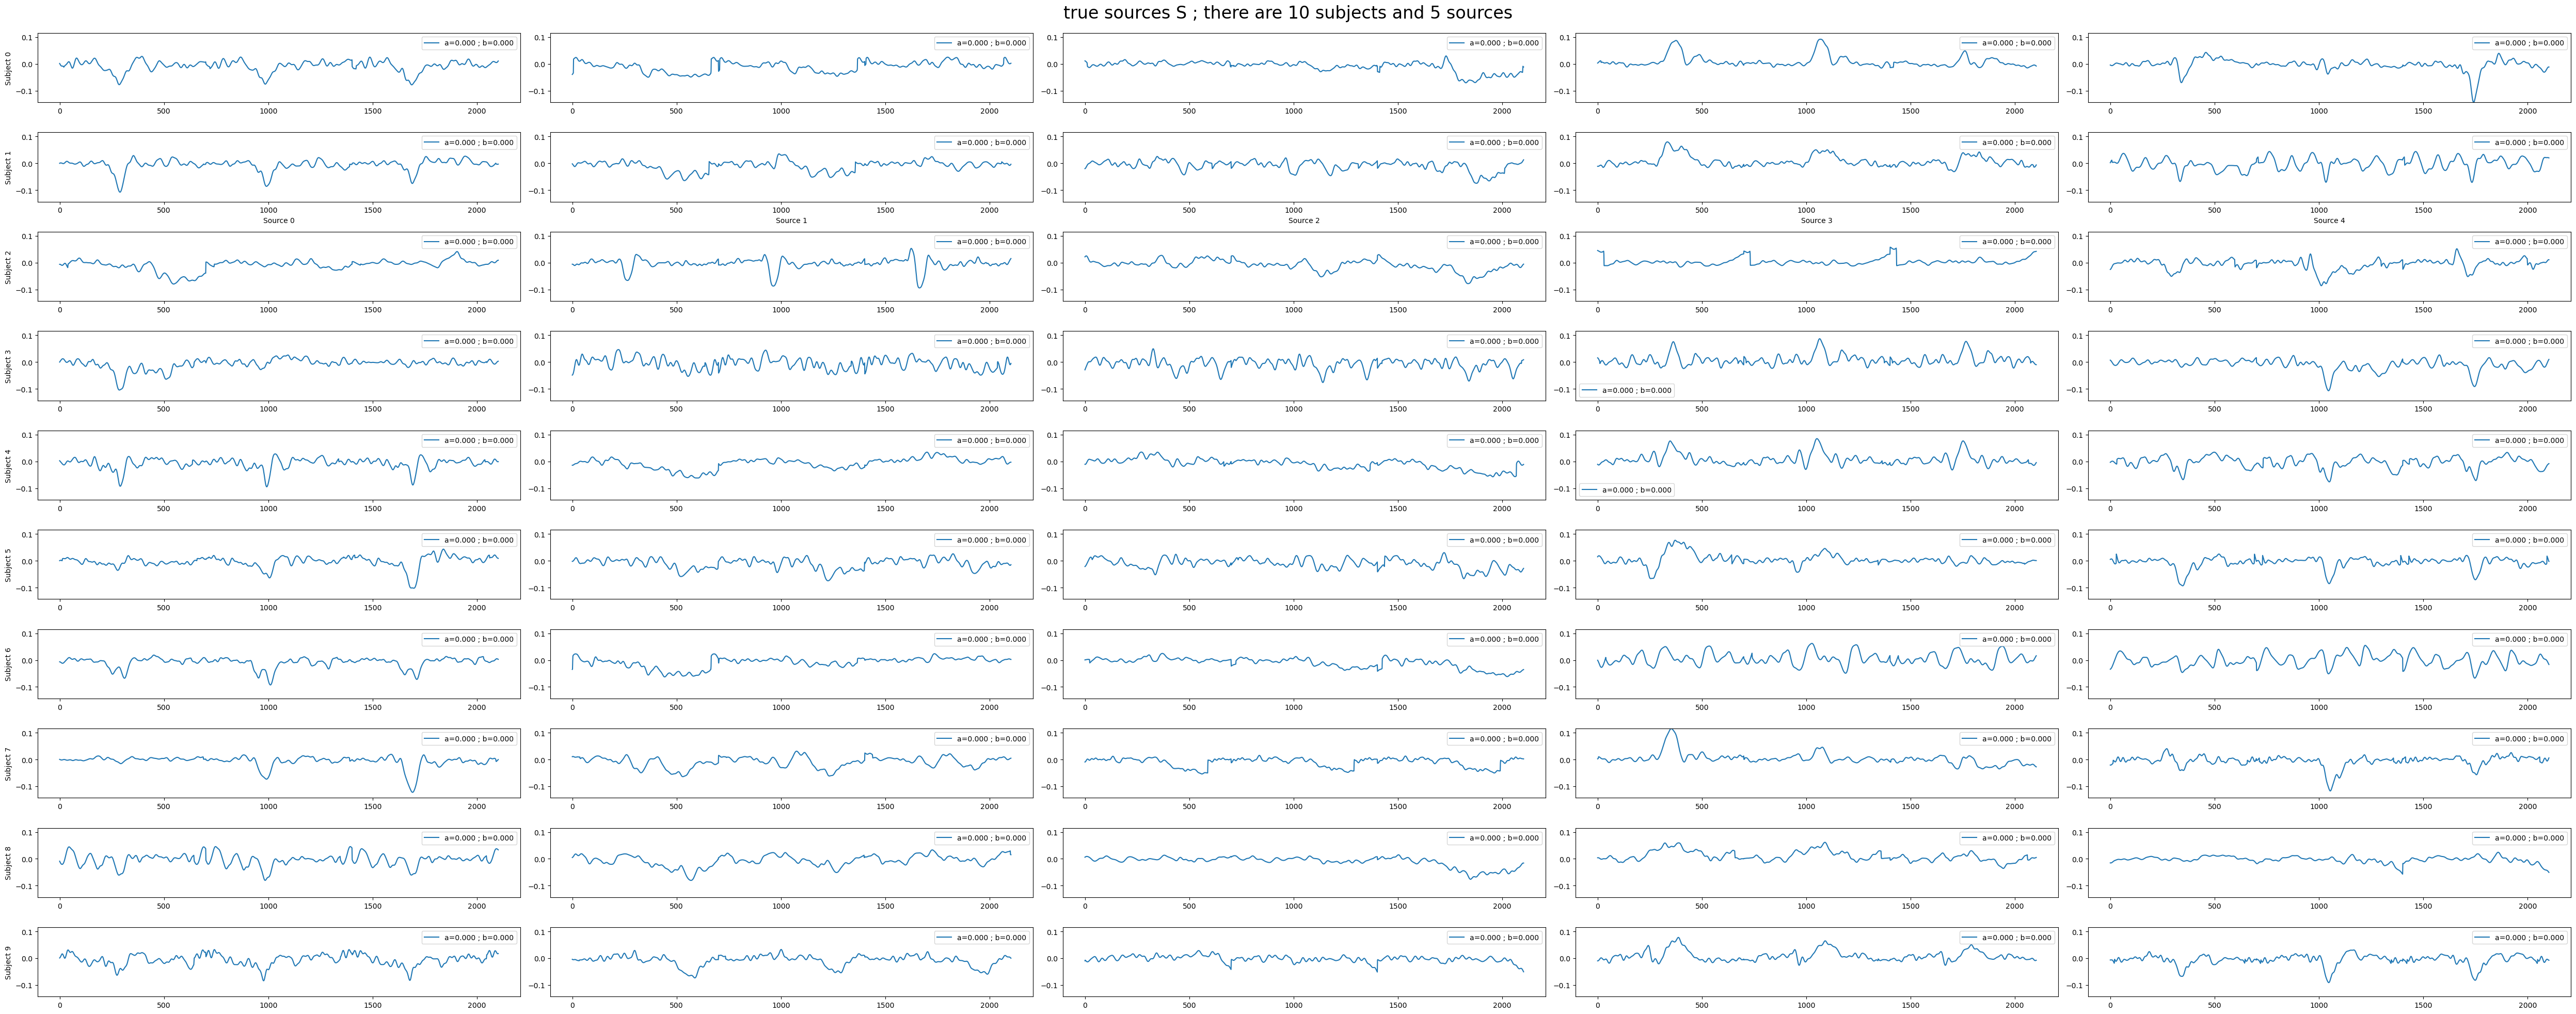

In [15]:
plot_sources_3d(Y_list[:10]);

In [23]:
# load ages
if task == "visual":
    n_subjects_data = 477
elif task == "auditory":
    n_subjects_data = 501
data_dir = f"/storage/store2/work/aheurteb/mvicad/tbme/data/camcan/{task}/"
ages_path = data_dir + f"ages_{task}_task_{n_subjects_data}_{n_concat}.npy"
ages = np.load(ages_path)[:n_subjects]

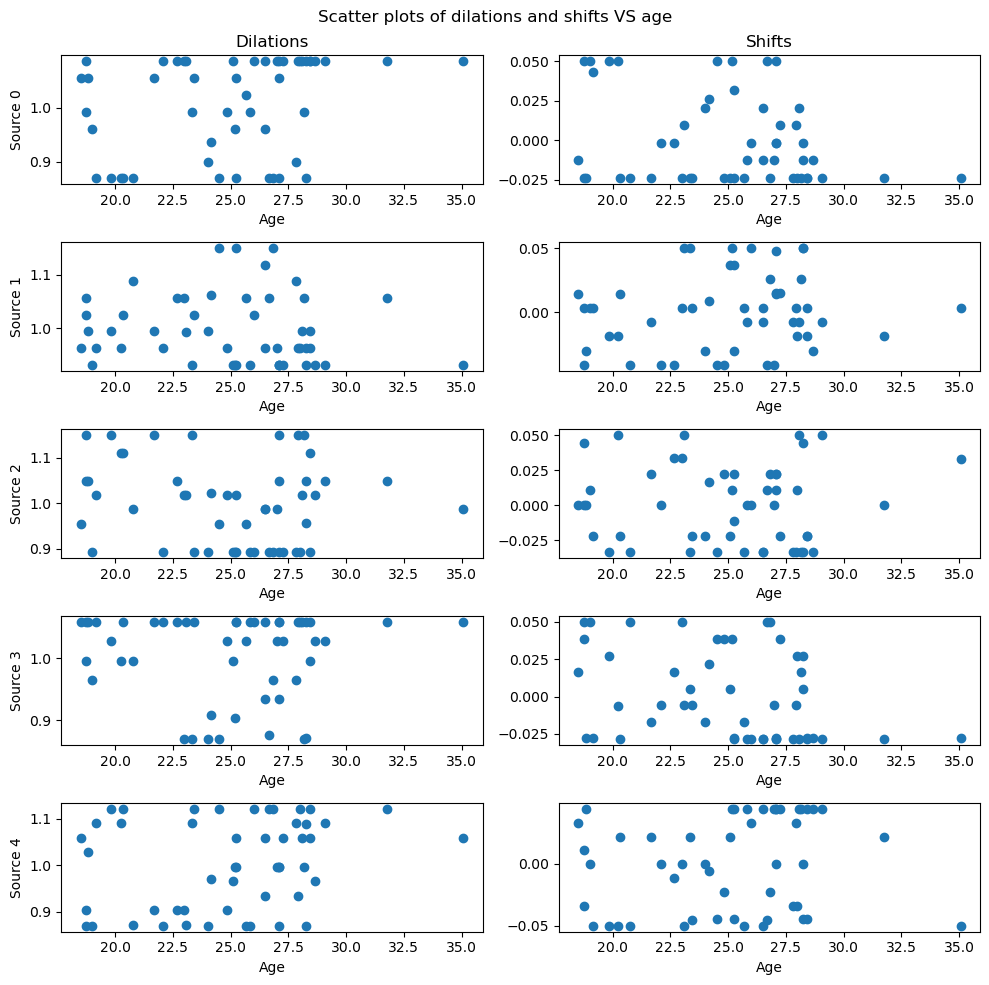

In [35]:
# scatter plots
fig, axes = plt.subplots(n_components, 2, figsize=(10, 2*n_components))
for i in range(n_components):
    ax = axes[i, 0]
    ax.scatter(ages, dilations[:, i])
    if i == 0:
        ax.set_title("Dilations")
    ax.set_xlabel("Age")
    ax.set_ylabel(f"Source {i}")

    ax = axes[i, 1]
    ax.scatter(ages, shifts[:, i])
    if i == 0:
        ax.set_title("Shifts")
    ax.set_xlabel("Age")

plt.suptitle("Scatter plots of dilations and shifts VS age")
plt.tight_layout()

- We observe that ages are all below 35. Indeed, we chose the 50 first subjects. We should shuffle them.
- Note that shifts and dilations should be negatively correlated to age. Indeed, we didn't apply the transformation shifts=-shifts and dilations=1/dilations.
- sources do not seem to be shared among subjects... I should maybe select cleaner data.